In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import nltk

In [2]:
X = pd.read_csv("D:/kaggle_datasets/nlp-getting-started/train.csv")
X_test = pd.read_csv("D:/kaggle_datasets/nlp-getting-started/test.csv")
submission = pd.read_csv("D:/kaggle_datasets/nlp-getting-started/sample_submission.csv")
y = X["target"]

In [3]:
X

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
X = X["text"]

# Tokenize

In [5]:
X = [nltk.word_tokenize(sentence) for sentence in X]

In [6]:
pd.DataFrame(X[:5])

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,Our,Deeds,are,the,Reason,of,this,#,earthquake,May,...,None,None,None,None,None,None,None,None,None,None
1,Forest,fire,near,La,Ronge,Sask,.,Canada,None,None,...,None,None,None,None,None,None,None,None,None,None
2,All,residents,asked,to,'shelter,in,place,',are,being,...,No,other,evacuation,or,shelter,in,place,orders,are,expected
3,"13,000",people,receive,#,wildfires,evacuation,orders,in,California,None,...,None,None,None,None,None,None,None,None,None,None
4,Just,got,sent,this,photo,from,Ruby,#,Alaska,as,...,pours,into,a,school,None,None,None,None,None,None


# Integer encoding

In [7]:
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

In [8]:
pd.DataFrame(X[:5])

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,136,4545,34,4,851,11,30,3,280.0,153.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,204,60,248,814,6874,6875,6,1199,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,57,1718,1591,10,6876,9,674,23,34.0,145.0,...,58.0,411.0,268.0,73.0,2384.0,9.0,674.0,1378.0,34.0,1091.0
3,6878,74,4547,3,1475,268,1378,9,108.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,48,101,1200,30,350,33,6879,3,1887.0,44.0,...,6880.0,83.0,8.0,201.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
tokenizer.word_index

{':': 1,
 'http': 2,
 '#': 3,
 'the': 4,
 '?': 5,
 '.': 6,
 '@': 7,
 'a': 8,
 'in': 9,
 'to': 10,
 'of': 11,
 'i': 12,
 'and': 13,
 '!': 14,
 'is': 15,
 '...': 16,
 'for': 17,
 'you': 18,
 'on': 19,
 "'s": 20,
 '-': 21,
 'it': 22,
 "'": 23,
 'my': 24,
 'that': 25,
 ';': 26,
 'with': 27,
 'at': 28,
 'by': 29,
 'this': 30,
 '&': 31,
 "n't": 32,
 'from': 33,
 'are': 34,
 'https': 35,
 'was': 36,
 'be': 37,
 'have': 38,
 ')': 39,
 '(': 40,
 'like': 41,
 'amp': 42,
 'do': 43,
 'as': 44,
 'but': 45,
 'me': 46,
 'up': 47,
 'just': 48,
 'so': 49,
 'not': 50,
 'your': 51,
 'out': 52,
 'we': 53,
 'has': 54,
 'will': 55,
 'after': 56,
 'all': 57,
 'no': 58,
 "'m": 59,
 'fire': 60,
 'an': 61,
 'when': 62,
 'he': 63,
 'if': 64,
 'get': 65,
 'they': 66,
 'new': 67,
 'now': 68,
 'what': 69,
 'via': 70,
 'more': 71,
 'about': 72,
 'or': 73,
 'people': 74,
 'news': 75,
 'one': 76,
 'how': 77,
 'been': 78,
 'who': 79,
 'over': 80,
 'there': 81,
 '*': 82,
 'into': 83,
 'can': 84,
 'video': 85,
 '2': 86,


Average langth of tweet: 18.914225666622883


(array([5.580e+02, 1.884e+03, 2.584e+03, 2.221e+03, 3.380e+02, 2.000e+01,
        3.000e+00, 2.000e+00, 1.000e+00, 2.000e+00]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <BarContainer object of 10 artists>)

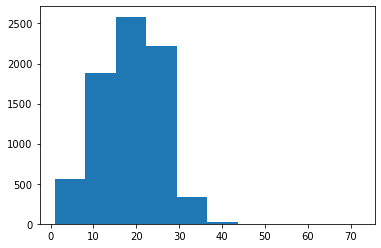

In [10]:
print("Average langth of tweet:", sum(map(len, X))/len(X))
plt.hist([len(tweet) for tweet in X])

Text(0.5, 1.0, 'Fake')

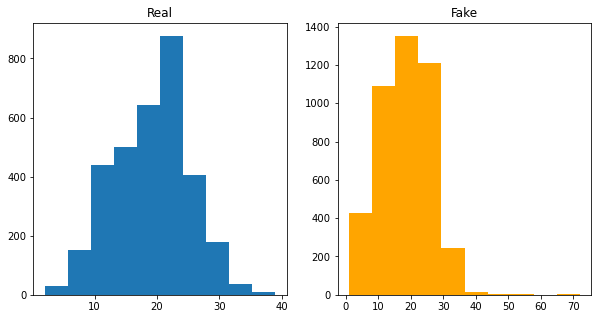

In [11]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.hist([len(X[i]) for i in range(len(X)) if y[i]==1])
ax1.set_title("Real")
ax2.hist([len(X[i]) for i in range(len(X)) if y[i]==0], color="orange")
ax2.set_title("Fake")

In [12]:
count=0
for tweet in X:
    if len(tweet) > 40:
        count+=1
print((len(X)-count) / len(X))

0.998555103113096


In [13]:
X = keras.preprocessing.sequence.pad_sequences(X, maxlen=40, padding="post")

In [14]:
def preprocess(text_sequence):
    text_sequence = [nltk.word_tokenize(sentence) for sentence in text_sequence]
    text_sequence =  tokenizer.texts_to_sequences(text_sequence)
    text_sequence = keras.preprocessing.sequence.pad_sequences(text_sequence, maxlen=40, padding="post") 
    return text_sequence

# Model tuning

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y)

In [145]:
def make_model(iter = 1, hidden=100):
    Input = keras.Input(shape=X[0].shape)
    x = keras.layers.Reshape((40, 1))(Input)
    
    for _ in range(iter):
        x = keras.layers.LSTM(hidden, return_sequences=True)(x)
        
    x = keras.layers.LSTM(hidden)(x)
    x = keras.layers.Dense((hidden+40)/2, activation="relu")(x)
    output = keras.layers.Dense(1, activation="sigmoid")(x)

    model = keras.Model(inputs=Input, outputs=output)
    model.compile(loss="binary_crossentropy", metrics="accuracy", optimizer="adam")
    return model

In [169]:
hist_list=[]
index_list=[]
for i in [0, 1, 2, 3]:
    for j in [40, 100, 200]:
        model = make_model(i, j)
        hist_list.append(model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50))
        index_list.append([i, j])

Epoch 1/50
179/179 [==============================] - 4s 12ms/step - loss: 0.6821 - accuracy: 0.5684 - val_loss: 0.6678 - val_accuracy: 0.5636
Epoch 2/50
179/179 [==============================] - 2s 9ms/step - loss: 0.6543 - accuracy: 0.6106 - val_loss: 0.6349 - val_accuracy: 0.6549
Epoch 3/50
179/179 [==============================] - 2s 9ms/step - loss: 0.6411 - accuracy: 0.6292 - val_loss: 0.6250 - val_accuracy: 0.6507
Epoch 4/50
179/179 [==============================] - 2s 10ms/step - loss: 0.6382 - accuracy: 0.6409 - val_loss: 0.6309 - val_accuracy: 0.6471
Epoch 5/50
179/179 [==============================] - 2s 10ms/step - loss: 0.6373 - accuracy: 0.6388 - val_loss: 0.6242 - val_accuracy: 0.6623
Epoch 6/50
179/179 [==============================] - 2s 10ms/step - loss: 0.6345 - accuracy: 0.6465 - val_loss: 0.6201 - val_accuracy: 0.6644
Epoch 7/50
179/179 [==============================] - 2s 10ms/step - loss: 0.6320 - accuracy: 0.6495 - val_loss: 0.6235 - val_accuracy: 0.6597
E

179/179 [==============================] - 2s 11ms/step - loss: 0.6309 - accuracy: 0.6527 - val_loss: 0.6226 - val_accuracy: 0.6544
Epoch 9/50
179/179 [==============================] - 2s 11ms/step - loss: 0.6281 - accuracy: 0.6605 - val_loss: 0.6156 - val_accuracy: 0.6759
Epoch 10/50
179/179 [==============================] - 2s 11ms/step - loss: 0.6280 - accuracy: 0.6598 - val_loss: 0.6129 - val_accuracy: 0.6786
Epoch 11/50
179/179 [==============================] - 2s 11ms/step - loss: 0.6206 - accuracy: 0.6660 - val_loss: 0.6086 - val_accuracy: 0.6833
Epoch 12/50
179/179 [==============================] - 2s 11ms/step - loss: 0.6225 - accuracy: 0.6628 - val_loss: 0.6045 - val_accuracy: 0.6801
Epoch 13/50
179/179 [==============================] - 2s 11ms/step - loss: 0.6164 - accuracy: 0.6660 - val_loss: 0.6044 - val_accuracy: 0.6812
Epoch 14/50
179/179 [==============================] - 2s 11ms/step - loss: 0.6164 - accuracy: 0.6703 - val_loss: 0.6080 - val_accuracy: 0.6791
Epoch

179/179 [==============================] - 2s 10ms/step - loss: 0.6014 - accuracy: 0.6842 - val_loss: 0.5963 - val_accuracy: 0.6843
Epoch 16/50
179/179 [==============================] - 2s 10ms/step - loss: 0.5960 - accuracy: 0.6915 - val_loss: 0.5915 - val_accuracy: 0.6896
Epoch 17/50
179/179 [==============================] - 2s 10ms/step - loss: 0.5921 - accuracy: 0.6908 - val_loss: 0.5932 - val_accuracy: 0.6954
Epoch 18/50
179/179 [==============================] - 2s 10ms/step - loss: 0.5894 - accuracy: 0.6978 - val_loss: 0.5923 - val_accuracy: 0.6943
Epoch 19/50
179/179 [==============================] - 2s 10ms/step - loss: 0.5844 - accuracy: 0.7013 - val_loss: 0.5996 - val_accuracy: 0.6907
Epoch 20/50
179/179 [==============================] - 2s 10ms/step - loss: 0.5834 - accuracy: 0.7017 - val_loss: 0.5949 - val_accuracy: 0.6901
Epoch 21/50
179/179 [==============================] - 2s 10ms/step - loss: 0.5775 - accuracy: 0.7013 - val_loss: 0.5988 - val_accuracy: 0.6875
Epoc

179/179 [==============================] - 3s 15ms/step - loss: 0.6193 - accuracy: 0.6696 - val_loss: 0.6085 - val_accuracy: 0.6801
Epoch 23/50
179/179 [==============================] - 3s 15ms/step - loss: 0.6168 - accuracy: 0.6695 - val_loss: 0.6013 - val_accuracy: 0.6907
Epoch 24/50
179/179 [==============================] - 3s 15ms/step - loss: 0.6155 - accuracy: 0.6751 - val_loss: 0.6031 - val_accuracy: 0.6912
Epoch 25/50
179/179 [==============================] - 3s 15ms/step - loss: 0.6168 - accuracy: 0.6728 - val_loss: 0.6063 - val_accuracy: 0.6864
Epoch 26/50
179/179 [==============================] - 3s 15ms/step - loss: 0.6127 - accuracy: 0.6781 - val_loss: 0.6100 - val_accuracy: 0.6759
Epoch 27/50
179/179 [==============================] - 3s 15ms/step - loss: 0.6144 - accuracy: 0.6756 - val_loss: 0.6028 - val_accuracy: 0.6928
Epoch 28/50
179/179 [==============================] - 3s 15ms/step - loss: 0.6140 - accuracy: 0.6731 - val_loss: 0.6023 - val_accuracy: 0.6886
Epoc

179/179 [==============================] - 2s 13ms/step - loss: 0.5798 - accuracy: 0.7008 - val_loss: 0.5924 - val_accuracy: 0.6917
Epoch 30/50
179/179 [==============================] - 2s 13ms/step - loss: 0.5802 - accuracy: 0.6966 - val_loss: 0.5957 - val_accuracy: 0.7059
Epoch 31/50
179/179 [==============================] - 2s 13ms/step - loss: 0.5787 - accuracy: 0.7028 - val_loss: 0.5814 - val_accuracy: 0.6922
Epoch 32/50
179/179 [==============================] - 2s 13ms/step - loss: 0.5736 - accuracy: 0.7035 - val_loss: 0.5859 - val_accuracy: 0.7048
Epoch 33/50
179/179 [==============================] - 2s 13ms/step - loss: 0.5699 - accuracy: 0.7113 - val_loss: 0.5918 - val_accuracy: 0.7064
Epoch 34/50
179/179 [==============================] - 2s 13ms/step - loss: 0.5655 - accuracy: 0.7084 - val_loss: 0.6117 - val_accuracy: 0.7001
Epoch 35/50
179/179 [==============================] - 2s 13ms/step - loss: 0.5643 - accuracy: 0.7119 - val_loss: 0.5974 - val_accuracy: 0.6912
Epoc

179/179 [==============================] - 3s 15ms/step - loss: 0.5048 - accuracy: 0.7518 - val_loss: 0.6049 - val_accuracy: 0.6838
Epoch 37/50
179/179 [==============================] - 3s 15ms/step - loss: 0.4917 - accuracy: 0.7646 - val_loss: 0.6248 - val_accuracy: 0.6849
Epoch 38/50
179/179 [==============================] - 3s 15ms/step - loss: 0.4842 - accuracy: 0.7672 - val_loss: 0.6400 - val_accuracy: 0.6817
Epoch 39/50
179/179 [==============================] - 3s 15ms/step - loss: 0.4728 - accuracy: 0.7684 - val_loss: 0.6265 - val_accuracy: 0.6822
Epoch 40/50
179/179 [==============================] - 3s 15ms/step - loss: 0.4674 - accuracy: 0.7774 - val_loss: 0.6490 - val_accuracy: 0.6849
Epoch 41/50
179/179 [==============================] - 3s 15ms/step - loss: 0.4421 - accuracy: 0.7870 - val_loss: 0.6858 - val_accuracy: 0.6796
Epoch 42/50
179/179 [==============================] - 3s 15ms/step - loss: 0.4463 - accuracy: 0.7831 - val_loss: 0.7108 - val_accuracy: 0.6749
Epoc

179/179 [==============================] - 4s 20ms/step - loss: 0.6004 - accuracy: 0.6900 - val_loss: 0.5954 - val_accuracy: 0.6870
Epoch 44/50
179/179 [==============================] - 4s 20ms/step - loss: 0.5971 - accuracy: 0.6989 - val_loss: 0.6013 - val_accuracy: 0.6801
Epoch 45/50
179/179 [==============================] - 4s 20ms/step - loss: 0.5957 - accuracy: 0.6935 - val_loss: 0.5994 - val_accuracy: 0.6891
Epoch 46/50
179/179 [==============================] - 4s 20ms/step - loss: 0.5922 - accuracy: 0.7013 - val_loss: 0.5999 - val_accuracy: 0.6843
Epoch 47/50
179/179 [==============================] - 3s 19ms/step - loss: 0.5882 - accuracy: 0.7052 - val_loss: 0.6065 - val_accuracy: 0.6843
Epoch 48/50
179/179 [==============================] - 3s 19ms/step - loss: 0.5895 - accuracy: 0.7029 - val_loss: 0.6088 - val_accuracy: 0.6723
Epoch 49/50
179/179 [==============================] - 3s 19ms/step - loss: 0.5940 - accuracy: 0.6968 - val_loss: 0.6005 - val_accuracy: 0.6838
Epoc

179/179 [==============================] - 3s 18ms/step - loss: 0.5085 - accuracy: 0.7465 - val_loss: 0.6720 - val_accuracy: 0.6749
Epoch 1/50
179/179 [==============================] - 9s 25ms/step - loss: 0.6686 - accuracy: 0.5901 - val_loss: 0.6368 - val_accuracy: 0.6418
Epoch 2/50
179/179 [==============================] - 3s 18ms/step - loss: 0.6494 - accuracy: 0.6204 - val_loss: 0.6311 - val_accuracy: 0.6633
Epoch 3/50
179/179 [==============================] - 3s 18ms/step - loss: 0.6428 - accuracy: 0.6360 - val_loss: 0.6301 - val_accuracy: 0.6444
Epoch 4/50
179/179 [==============================] - 3s 18ms/step - loss: 0.6378 - accuracy: 0.6469 - val_loss: 0.6312 - val_accuracy: 0.6465
Epoch 5/50
179/179 [==============================] - 3s 18ms/step - loss: 0.6349 - accuracy: 0.6460 - val_loss: 0.6240 - val_accuracy: 0.6686
Epoch 6/50
179/179 [==============================] - 3s 18ms/step - loss: 0.6329 - accuracy: 0.6513 - val_loss: 0.6207 - val_accuracy: 0.6707
Epoch 7/50

179/179 [==============================] - 3s 18ms/step - loss: 0.6345 - accuracy: 0.6509 - val_loss: 0.6190 - val_accuracy: 0.6644
Epoch 8/50
179/179 [==============================] - 3s 18ms/step - loss: 0.6350 - accuracy: 0.6416 - val_loss: 0.6265 - val_accuracy: 0.6623
Epoch 9/50
179/179 [==============================] - 3s 18ms/step - loss: 0.6307 - accuracy: 0.6523 - val_loss: 0.6189 - val_accuracy: 0.6628
Epoch 10/50
179/179 [==============================] - 3s 18ms/step - loss: 0.6286 - accuracy: 0.6597 - val_loss: 0.6134 - val_accuracy: 0.6775
Epoch 11/50
179/179 [==============================] - 3s 18ms/step - loss: 0.6285 - accuracy: 0.6520 - val_loss: 0.6216 - val_accuracy: 0.6691
Epoch 12/50
179/179 [==============================] - 3s 19ms/step - loss: 0.6236 - accuracy: 0.6703 - val_loss: 0.6132 - val_accuracy: 0.6817
Epoch 13/50
179/179 [==============================] - 3s 19ms/step - loss: 0.6238 - accuracy: 0.6576 - val_loss: 0.6156 - val_accuracy: 0.6780
Epoch 

179/179 [==============================] - 4s 24ms/step - loss: 0.6240 - accuracy: 0.6675 - val_loss: 0.6230 - val_accuracy: 0.6786
Epoch 15/50
179/179 [==============================] - 4s 24ms/step - loss: 0.6226 - accuracy: 0.6684 - val_loss: 0.6033 - val_accuracy: 0.6917
Epoch 16/50
179/179 [==============================] - 4s 24ms/step - loss: 0.6199 - accuracy: 0.6710 - val_loss: 0.6111 - val_accuracy: 0.6786
Epoch 17/50
179/179 [==============================] - 4s 23ms/step - loss: 0.6174 - accuracy: 0.6747 - val_loss: 0.6074 - val_accuracy: 0.6828
Epoch 18/50
179/179 [==============================] - 4s 23ms/step - loss: 0.6179 - accuracy: 0.6717 - val_loss: 0.6176 - val_accuracy: 0.6654
Epoch 19/50
179/179 [==============================] - 4s 23ms/step - loss: 0.6144 - accuracy: 0.6789 - val_loss: 0.6021 - val_accuracy: 0.6917
Epoch 20/50
179/179 [==============================] - 4s 24ms/step - loss: 0.6124 - accuracy: 0.6775 - val_loss: 0.6531 - val_accuracy: 0.6560
Epoc

179/179 [==============================] - 4s 22ms/step - loss: 0.6835 - accuracy: 0.5703 - val_loss: 0.6834 - val_accuracy: 0.5704
Epoch 22/50
179/179 [==============================] - 4s 22ms/step - loss: 0.6833 - accuracy: 0.5703 - val_loss: 0.6832 - val_accuracy: 0.5704
Epoch 23/50
179/179 [==============================] - 4s 22ms/step - loss: 0.6842 - accuracy: 0.5703 - val_loss: 0.6834 - val_accuracy: 0.5704
Epoch 24/50
179/179 [==============================] - 4s 21ms/step - loss: 0.6840 - accuracy: 0.5703 - val_loss: 0.6832 - val_accuracy: 0.5704
Epoch 25/50
179/179 [==============================] - 4s 22ms/step - loss: 0.6838 - accuracy: 0.5703 - val_loss: 0.6834 - val_accuracy: 0.5704
Epoch 26/50
179/179 [==============================] - 4s 23ms/step - loss: 0.6837 - accuracy: 0.5703 - val_loss: 0.6832 - val_accuracy: 0.5704
Epoch 27/50
179/179 [==============================] - 4s 22ms/step - loss: 0.6833 - accuracy: 0.5703 - val_loss: 0.6840 - val_accuracy: 0.5704
Epoc

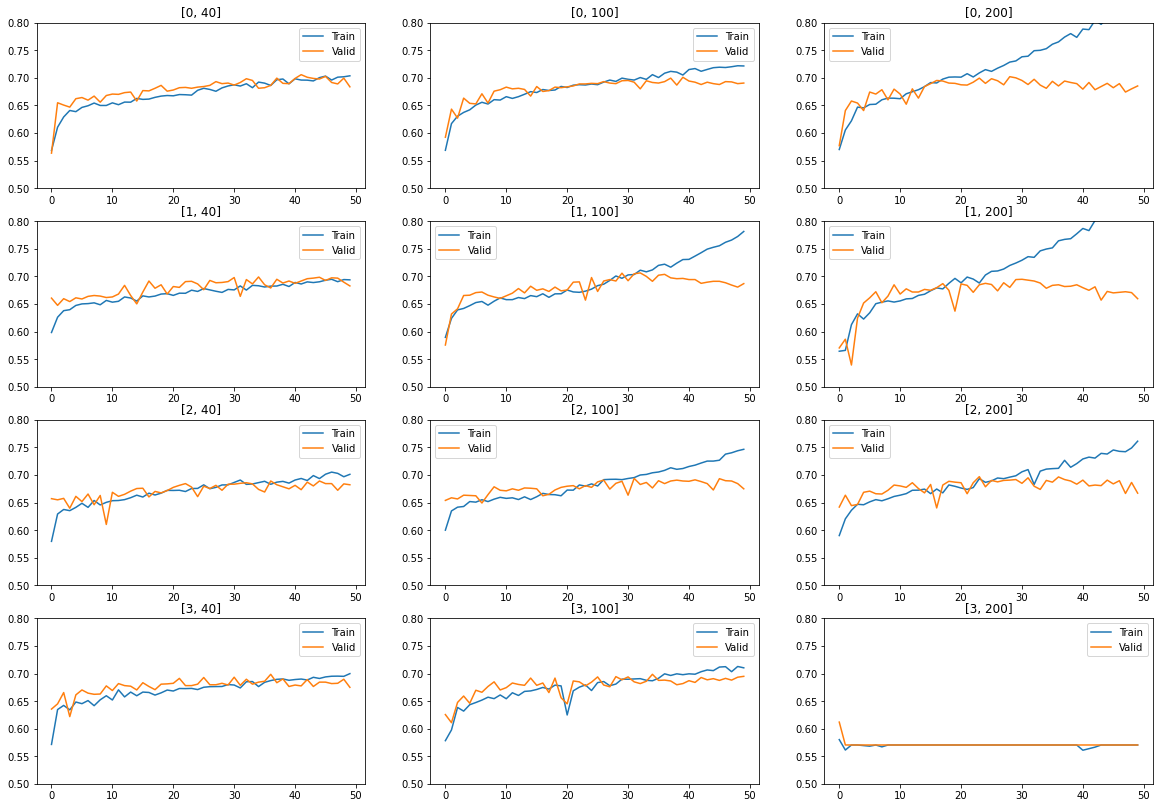

In [171]:
fig = plt.figure(figsize=(20, 14))
for i in range(1, 13):
    ax = plt.subplot(4, 3, i)
    plt.ylim(0.5, 0.8)
    plt.plot(hist_list[i-1].history["accuracy"], label="Train")    
    plt.plot(hist_list[i-1].history["val_accuracy"], label="Valid")
    plt.title(index_list[i-1])
    plt.legend()

# Train and test model

In [15]:
def make_model(iter = 1, hidden=100):
    Input = keras.Input(shape=X[0].shape)
    x = keras.layers.Reshape((40, 1))(Input)
    
    for _ in range(iter):
        x = keras.layers.LSTM(hidden, return_sequences=True)(x)
        
    x = keras.layers.LSTM(hidden)(x)
    x = keras.layers.Dense((hidden+40)/2, activation="relu")(x)
    output = keras.layers.Dense(1, activation="sigmoid")(x)

    model = keras.Model(inputs=Input, outputs=output)
    model.compile(loss="binary_crossentropy", metrics="accuracy", optimizer="adam")
    return model

In [18]:
model = make_model(1, 100)
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30)

Epoch 1/30
179/179 [==============================] - 6s 15ms/step - loss: 0.6543 - accuracy: 0.6078 - val_loss: 0.6512 - val_accuracy: 0.6276
Epoch 2/30
179/179 [==============================] - 2s 9ms/step - loss: 0.6393 - accuracy: 0.6371 - val_loss: 0.6444 - val_accuracy: 0.6402
Epoch 3/30
179/179 [==============================] - 2s 9ms/step - loss: 0.6362 - accuracy: 0.6406 - val_loss: 0.6417 - val_accuracy: 0.6392
Epoch 4/30
179/179 [==============================] - 2s 9ms/step - loss: 0.6338 - accuracy: 0.6446 - val_loss: 0.6372 - val_accuracy: 0.6518
Epoch 5/30
179/179 [==============================] - 2s 9ms/step - loss: 0.6303 - accuracy: 0.6477 - val_loss: 0.6497 - val_accuracy: 0.6387
Epoch 6/30
179/179 [==============================] - 2s 9ms/step - loss: 0.6308 - accuracy: 0.6462 - val_loss: 0.6452 - val_accuracy: 0.6271
Epoch 7/30
179/179 [==============================] - 2s 9ms/step - loss: 0.6259 - accuracy: 0.6577 - val_loss: 0.6294 - val_accuracy: 0.6555
Epoch

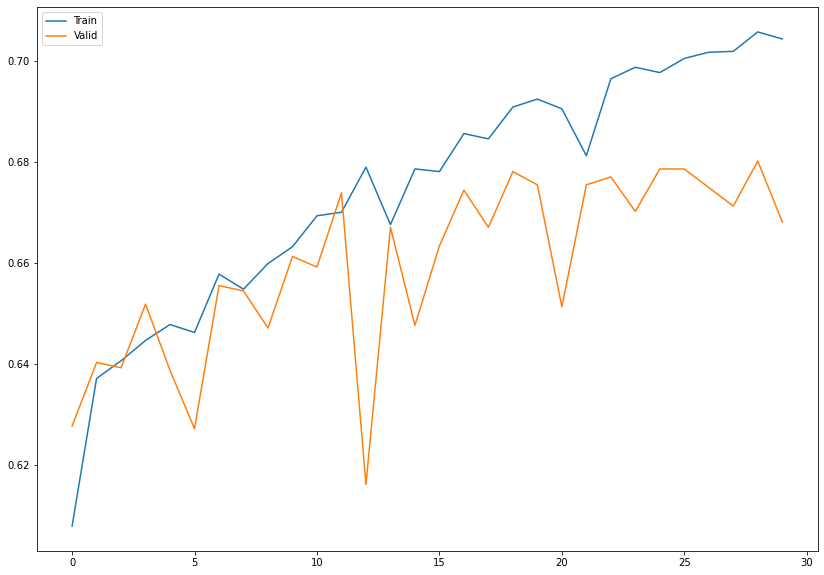

In [19]:
plt.figure(figsize=(14, 10))
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Valid")
plt.legend()

In [23]:
history.history["val_accuracy"][-5:]

[0.6785714030265808,
 0.6748949289321899,
 0.6712185144424438,
 0.6801470518112183,
 0.668067216873169]

In [104]:
model.evaluate(X_valid, y_valid)

60/60 [==============================] - 1s 6ms/step - loss: 0.5932 - accuracy: 0.6954


[0.5932331681251526, 0.6953781247138977]

In [100]:
X_test = preprocess(X_test["text"])`

In [101]:
submission["target"] = (model.predict(X_test)>0.5).astype("int32")

In [102]:
submission.to_csv("./rnn_base.csv", index=None)